In [1]:
import pandas as pd
import numpy as np

from plotnine import (
    ggplot,
    aes,
    geom_col,
    geom_text,
    position_dodge,
    lims,
    theme,
    element_text,
    element_blank,
    element_rect,
    element_line,
)


### Two Variable Bar Plot

*Visualising on a single plot the values of a variable that has nested (and independent) variables*

Create the data

In [2]:
df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])
df['category'] = pd.Categorical(df['category'], categories=df['category'])

df

,variable,category,value
0,gender,Female,60
1,gender,Male,40
2,age,1-24,50
3,age,25-54,30
4,age,55+,20
5,income,Lo,10
6,income,Lo-Med,25
7,income,Med,25
8,income,High,40


We want to visualise this data and at a galance get an idea to how the `value` breaks down along the `category`s for the different `variable`.
Note that each `variable` has different `category`s.

First we make a simple plot with all this information and see what to draw from it.

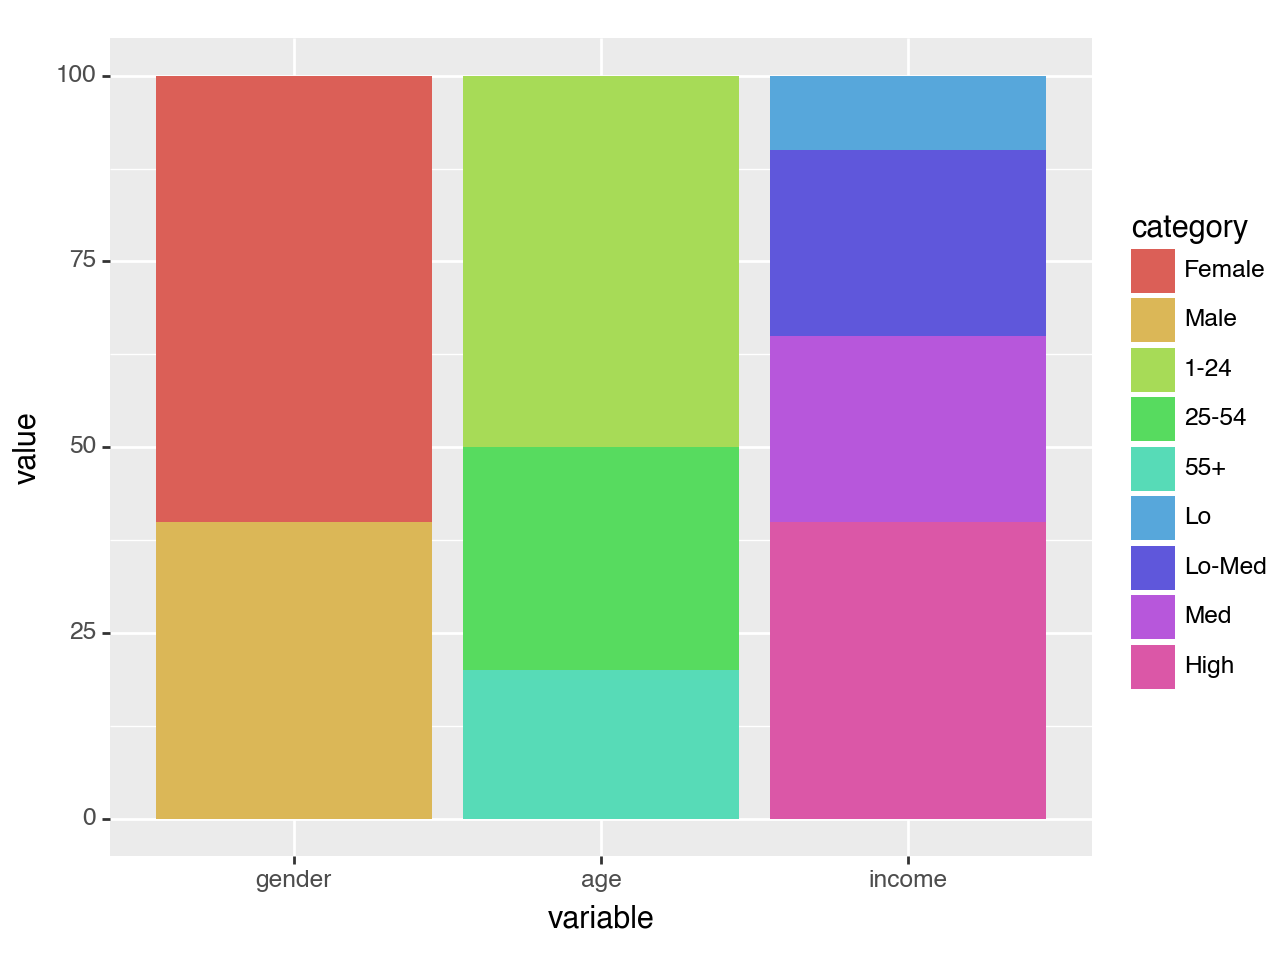

<Figure Size: (640 x 480)>

In [3]:
(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_col()
)

All the `value`s along each variable add up to 100, but stacked together the difference within and without the groups is not clear. 
The solution is to `dodge` the bars.

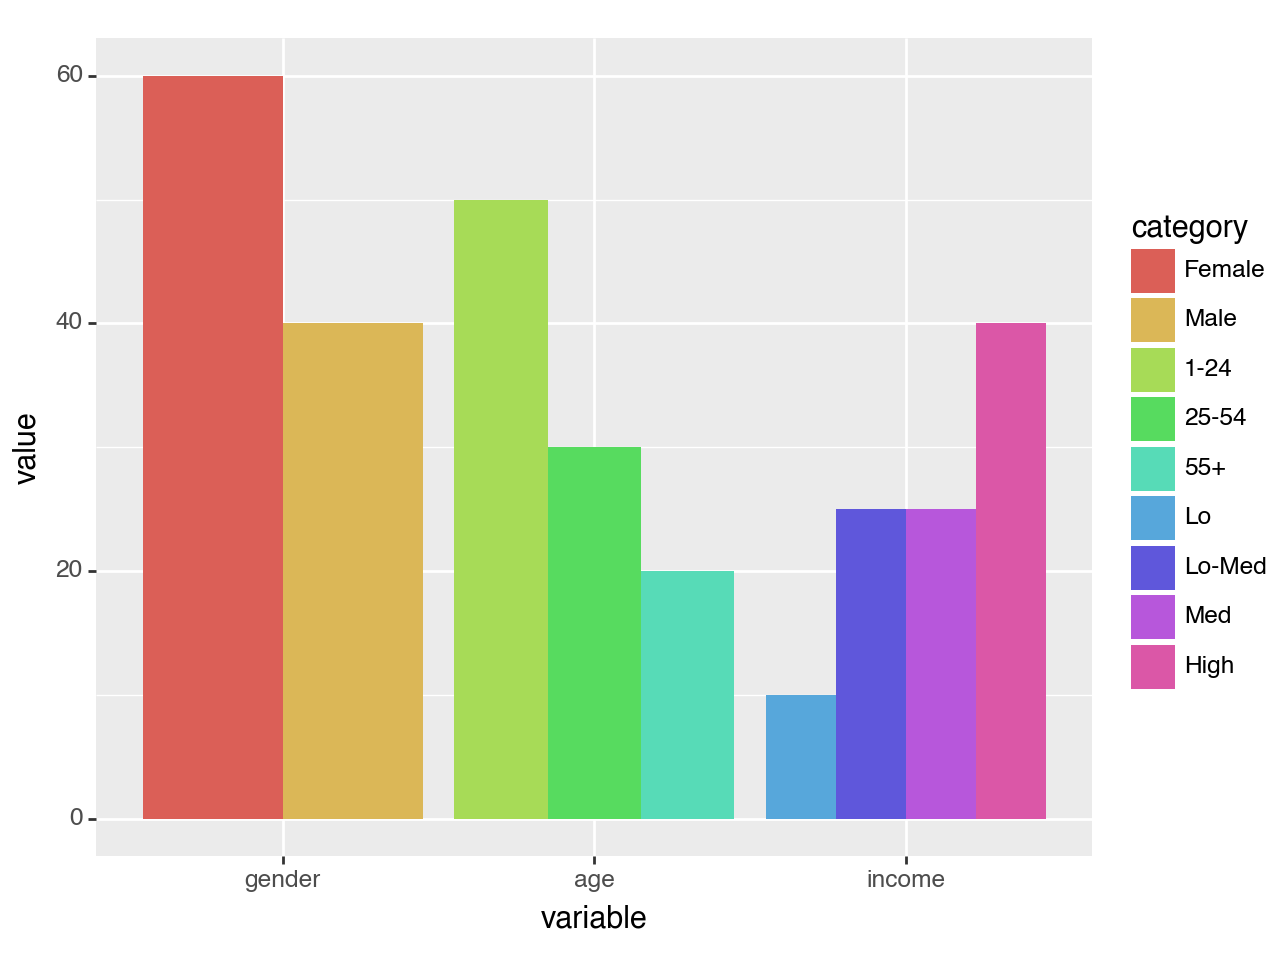

<Figure Size: (640 x 480)>

In [4]:
(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_col(stat='identity', position='dodge'))                     # modified

This is good, it gives us the plot we want but the legend is not great. Each `variable` has a different set of `category`s, but the legend has them all clamped together. We cannot easily change the legend, but we can replicate it's purpose by labelling the individual bars.

To do this, we create a `geom_text` with `position_dodge(width=0.9)` to match the ratio of the space taken up by each variable. If there was no spacing between the bars of different variables, we would have `width=1`.

A minor quack, when text extends beyond the limits we have to manually make space or it would get clipped. Therefore we adjust the bottom `y` limits.

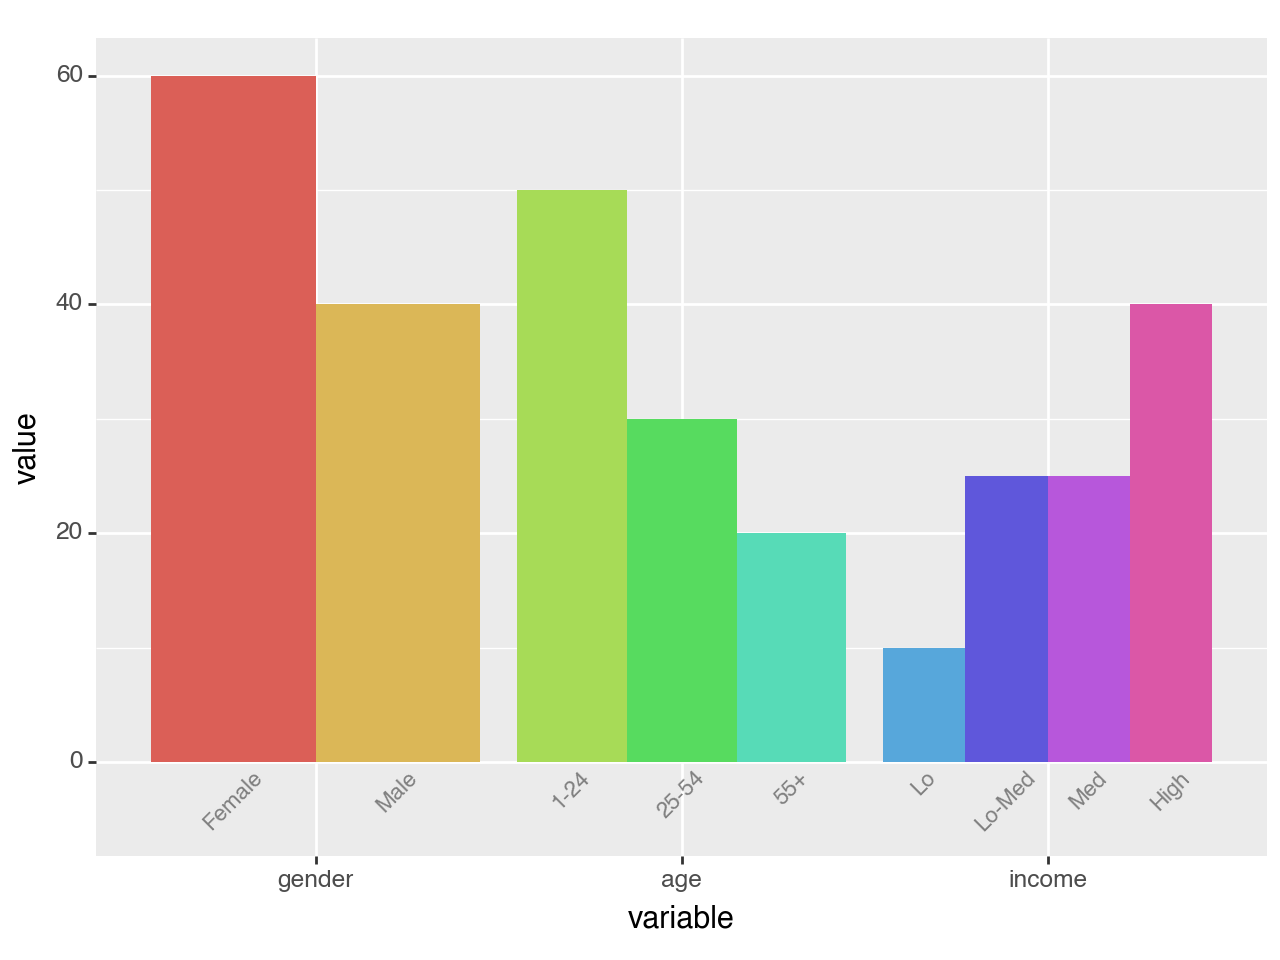

<Figure Size: (640 x 480)>

In [5]:
dodge_text = position_dodge(width=0.9)                              # new

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_col(stat='identity', position='dodge', show_legend=False)   # modified
 + geom_text(aes(y=-.5, label='category'),                          # new
             position=dodge_text,
             color='gray', size=8, angle=45, va='top')
 + lims(y=(-5, 60))                                                 # new
)


Would it look too crowded if we add value labels on top of the bars?

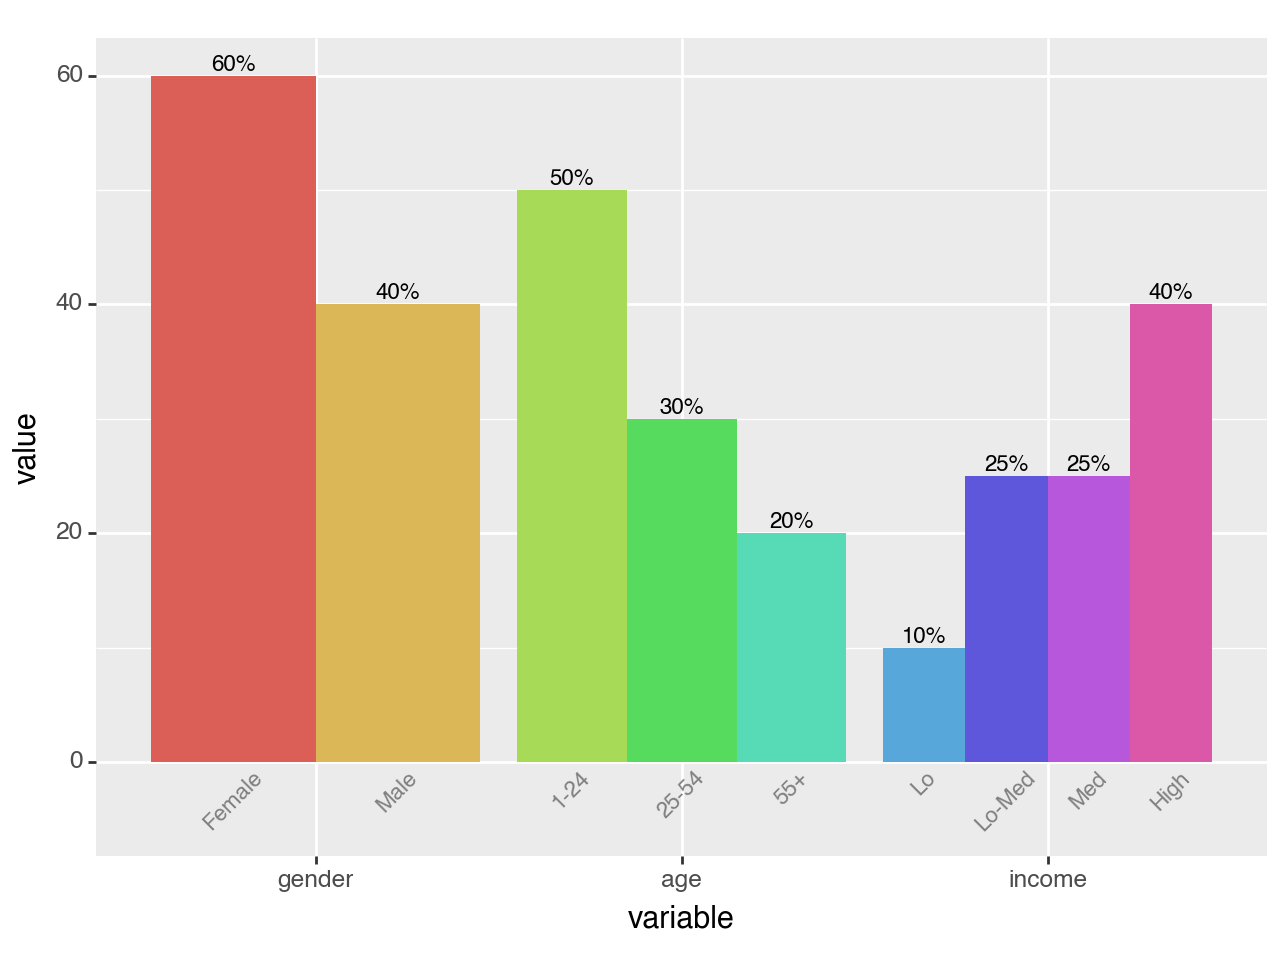

<Figure Size: (640 x 480)>

In [6]:
dodge_text = position_dodge(width=0.9)

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_col(stat='identity', position='dodge', show_legend=False)
 + geom_text(aes(y=-.5, label='category'),
             position=dodge_text,
             color='gray', size=8, angle=45, va='top')
 + geom_text(aes(label='value'),                                    # new
             position=dodge_text,
             size=8, va='bottom', format_string='{}%')
 + lims(y=(-5, 60))
)

That looks okay. The `value`s line up with the `category`s because we used the same `dodge` parameters. For the final polish, we remove the y-axis, clear out the panel and make the `variable` and `category` labels have the same color.

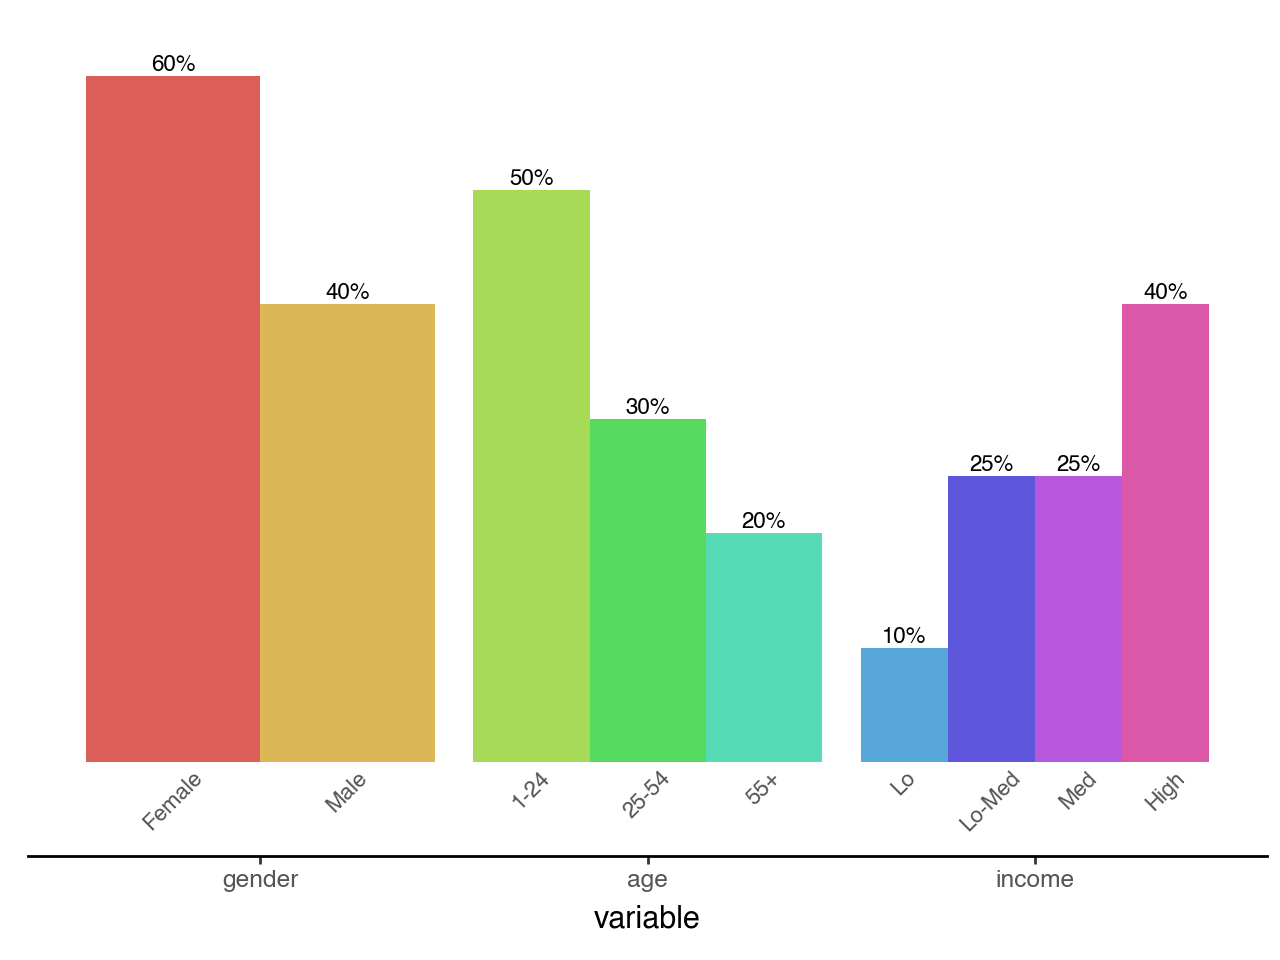

<Figure Size: (640 x 480)>

In [7]:
dodge_text = position_dodge(width=0.9)
ccolor = '#555555'

# Gallery Plot

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_col(stat='identity', position='dodge', show_legend=False)
 + geom_text(aes(y=-.5, label='category'),
             position=dodge_text,
             color=ccolor, size=8, angle=45, va='top')              # modified
 + geom_text(aes(label='value'),
             position=dodge_text,
             size=8, va='bottom', format_string='{}%')
 + lims(y=(-5, 60))
 + theme(panel_background=element_rect(fill='white'),               # new
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_line_y=element_blank(),
         axis_text_y=element_blank(),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
)

**Credit**: I saved a plot this example is based on a while ago and forgot/misplaced the link to the source. The user considered it a minor coup.